<a href="https://colab.research.google.com/github/NomensenSiregar/Flowers-Detection/blob/main/FlowersDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder dataset di Google Drive
dataset_path = '/content/drive/MyDrive/UAS_CV'

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Path ke folder dataset hasil augmentasi
augmented_dataset_path = '/content/drive/My Drive/augmented_dataset/'  # Sesuaikan dengan path folder hasil augmentasi

# Menyiapkan ImageDataGenerator untuk memuat dataset
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalisasi gambar
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    augmented_dataset_path,
    target_size=(224, 224),  # Ukuran gambar yang akan diproses
    batch_size=32,  # Ukuran batch untuk training
    class_mode='categorical'  # Mode untuk klasifikasi (beberapa kelas)
)

# Menyiapkan model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Jumlah kelas berdasarkan data
])

# Menyusun model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
history = model.fit(train_generator, epochs=10)  # Menyesuaikan jumlah epoch sesuai kebutuhan


Found 3597 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 1556s 13s/step - accuracy: 0.7561 - loss: 1.0290
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 811s 7s/step - accuracy: 0.9308 - loss: 0.1988
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 855s 7s/step - accuracy: 0.9667 - loss: 0.1068
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 793s 7s/step - accuracy: 0.9705 - loss: 0.0874
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 805s 7s/step - accuracy: 0.9799 - loss: 0.0628
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 799s 7s/step - accuracy: 0.9919 - loss: 0.0341
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 796s 7s/step - accuracy: 0.9904 - loss: 0.0283
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 816s 7s/step - accuracy: 0.9861 - loss: 0.0460
Epoch 9/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 801s 7s/step - accuracy: 0.9897 - loss: 0.0359
Epoch 10/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 793s 7s/step - accuracy: 0.9881 - loss: 0.0433


In [ ]:
# Path ke dataset validasi (jika tersedia)
validation_dataset_path = '/content/drive/MyDrive/augmented_dataset/validation_data'  # Sesuaikan path jika ada data validasi

# Siapkan data validasi
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Evaluasi model pada data validasi
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


Found 80 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 8s/step - accuracy: 0.9937 - loss: 0.0298
Loss: 0.03591323643922806
Accuracy: 0.987500011920929


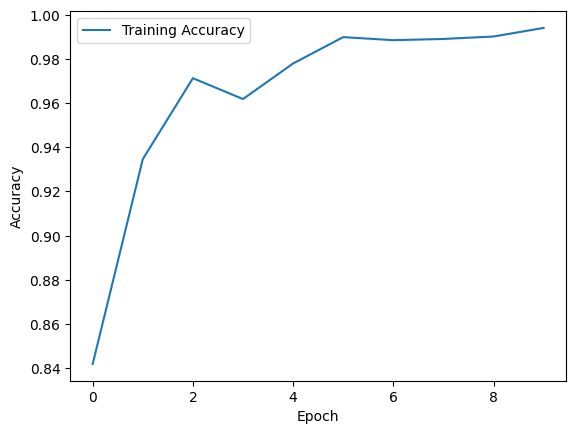

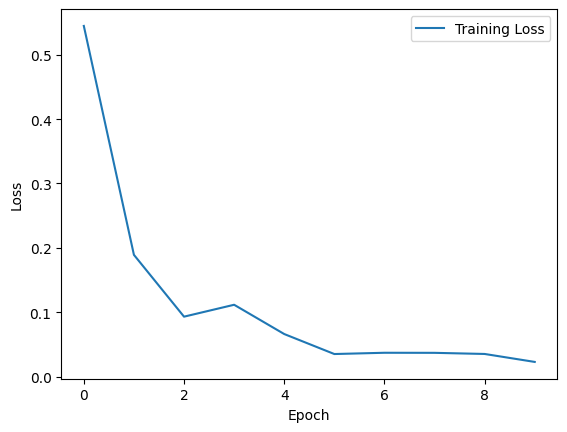

In [ ]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


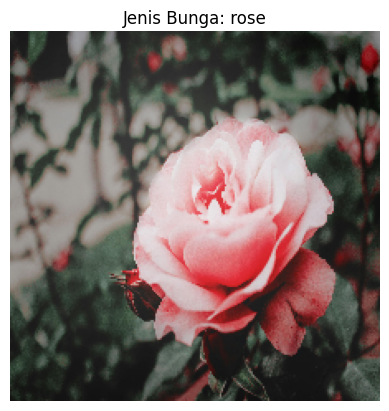

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path ke gambar yang ingin diprediksi
img_path = '/content/pexels-khaledreese-776996.jpg'  # Ganti dengan path gambar yang ingin diprediksi

# Fungsi untuk memprediksi dan menampilkan gambar
def predict_and_display(img_path, model, class_indices):
    # Load gambar
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi sama seperti data pelatihan

    # Prediksi
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)

    # Mapping indeks ke label
    labels = {v: k for k, v in class_indices.items()}  # Membalik mapping
    predicted_label = labels[predicted_class[0]]

    # Tampilkan gambar dan label prediksi
    plt.imshow(img)
    plt.title(f"Jenis Bunga: {predicted_label}")
    plt.axis('off')
    plt.show()

# Panggil fungsi prediksi
predict_and_display(img_path, model, train_generator.class_indices)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


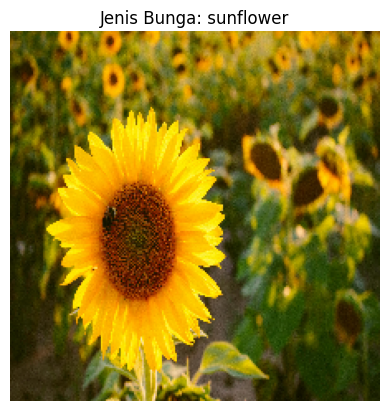

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path ke gambar yang ingin diprediksi
img_path = '/content/pexels-karol-wisniewski-279026-878560.jpg'  # Ganti dengan path gambar yang ingin diprediksi

# Fungsi untuk memprediksi dan menampilkan gambar
def predict_and_display(img_path, model, class_indices):
    # Load gambar
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi sama seperti data pelatihan

    # Prediksi
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)

    # Mapping indeks ke label
    labels = {v: k for k, v in class_indices.items()}  # Membalik mapping
    predicted_label = labels[predicted_class[0]]

    # Tampilkan gambar dan label prediksi
    plt.imshow(img)
    plt.title(f"Jenis Bunga: {predicted_label}")
    plt.axis('off')
    plt.show()

# Panggil fungsi prediksi
predict_and_display(img_path, model, train_generator.class_indices)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


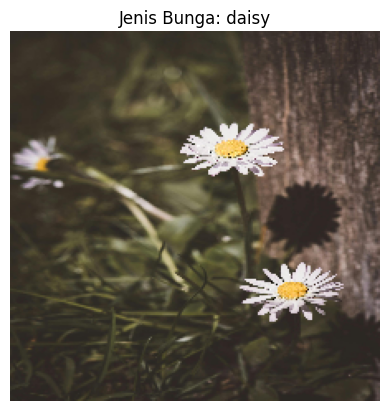

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path ke gambar yang ingin diprediksi
img_path = '/content/pexels-pixabay-432843.jpg'  # Ganti dengan path gambar yang ingin diprediksi

# Fungsi untuk memprediksi dan menampilkan gambar
def predict_and_display(img_path, model, class_indices):
    # Load gambar
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi sama seperti data pelatihan

    # Prediksi
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)

    # Mapping indeks ke label
    labels = {v: k for k, v in class_indices.items()}  # Membalik mapping
    predicted_label = labels[predicted_class[0]]

    # Tampilkan gambar dan label prediksi
    plt.imshow(img)
    plt.title(f"Jenis Bunga: {predicted_label}")
    plt.axis('off')
    plt.show()

# Panggil fungsi prediksi
predict_and_display(img_path, model, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


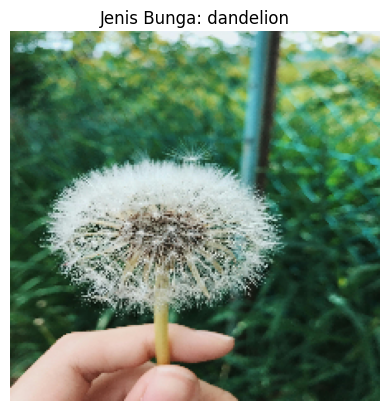

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path ke gambar yang ingin diprediksi
img_path = '/content/pexels-chama-214531-695946.jpg'  # Ganti dengan path gambar yang ingin diprediksi

# Fungsi untuk memprediksi dan menampilkan gambar
def predict_and_display(img_path, model, class_indices):
    # Load gambar
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi sama seperti data pelatihan

    # Prediksi
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions, axis=1)

    # Mapping indeks ke label
    labels = {v: k for k, v in class_indices.items()}  # Membalik mapping
    predicted_label = labels[predicted_class[0]]

    # Tampilkan gambar dan label prediksi
    plt.imshow(img)
    plt.title(f"Jenis Bunga: {predicted_label}")
    plt.axis('off')
    plt.show()

# Panggil fungsi prediksi
predict_and_display(img_path, model, train_generator.class_indices)

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step


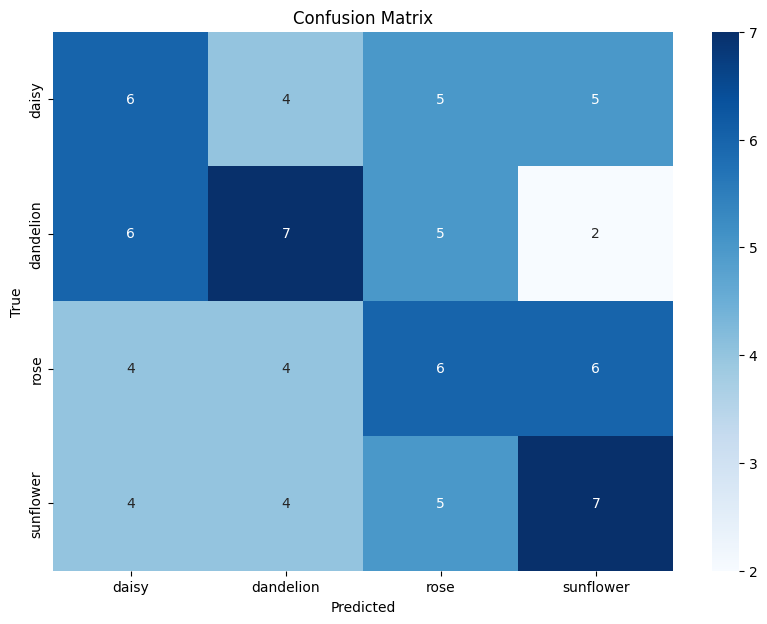

              precision    recall  f1-score   support

       daisy       0.30      0.30      0.30        20
   dandelion       0.37      0.35      0.36        20
        rose       0.29      0.30      0.29        20
   sunflower       0.35      0.35      0.35        20

    accuracy                           0.33        80
   macro avg       0.33      0.32      0.33        80
weighted avg       0.33      0.33      0.33        80



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Prediksi data validasi
y_true = validation_generator.classes
y_pred = np.argmax(model.predict(validation_generator), axis=-1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))
